In [46]:
import os
import pandas as pd
import numpy as np
import plotnine as p9

In [47]:
# list output files
file_paths = os.listdir(os.path.join('data', 'results'))
# keep only .csv files
results = [pd.read_csv(os.path.join('data', 'results', p)) for p in file_paths if p.endswith('.csv')]

In [48]:
results = pd.concat(results)

In [49]:
results['mean_auc'] = results.groupby(['reduction_name', 'dataset', 'score_key'])['auc'].transform('mean')
results['mean_f1'] = results.groupby(['reduction_name', 'dataset', 'score_key'])['f1_score'].transform('mean')

In [50]:
results

,reduction_name,score_key,fold,auc,tpr,fpr,f1_score,oob_score,train_split,test_split,test_classes,dataset,mean_auc,mean_f1
0,mofa,expr_prod,0,1.000000,[0. 0.2 1. 1. ],[0. 0. 0. 1.],0.868182,0.642857,[ 0 1 2 3 5 6 7 8 10 14 15 17 20 21],[ 4 9 11 12 13 16 18 19],[1 0 0 1 1 0 1 1],carraro,0.930556,0.846537
1,tensor,expr_prod,0,0.666667,[0. 0.16666667 0.5 0.5 0...,[0. 0. 0. 0.5 0.5 1. 1. ],0.750000,0.214286,[ 0 1 2 3 5 6 7 8 10 14 15 17 20 21],[ 4 9 11 12 13 16 18 19],[1 1 0 0 1 1 1 1],carraro,0.577778,0.613636
2,mofa,lr_logfc,0,0.533333,[0. 0.2 0.6 0.6 0.8 1. ],[0. 0.33333333 0.33333333 0.66666667 0...,0.480769,0.500000,[ 0 1 2 3 5 6 7 8 10 14 15 17 20 21],[ 4 9 11 12 13 16 18 19],[1 0 0 1 1 0 1 1],carraro,0.511111,0.447702
3,tensor,lr_logfc,0,0.250000,[0. 0.16666667 0.16666667 0.33333333 0...,[0. 0. 0.5 0.5 1. 1. 1. ],0.576923,0.428571,[ 0 1 2 3 5 6 7 8 10 14 15 17 20 21],[ 4 9 11 12 13 16 18 19],[1 1 0 0 1 1 1 1],carraro,0.388889,0.525641
4,mofa,lr_means,0,0.633333,[0. 0.2 0.4 0.4 0.6 1. 1. ],[0. 0. 0. 0.33333333 0...,0.604545,0.285714,[ 0 1 2 3 5 6 7 8 10 14 15 17 20 21],[ 4 9 11 12 13 16 18 19],[1 0 0 1 1 0 1 1],carraro,0.391667,0.590404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,tensor,lr_probs,2,0.404762,[0. 0. 0.33333333 0.33333333 0...,[0. 0.14285714 0.14285714 0.57142857 0...,0.338462,0.703704,[ 0 1 2 3 4 5 7 8 13 17 19 20 21 22 23 ...,[ 6 9 10 11 12 14 15 16 18 24 26 30 37],[1 0 0 0 1 1 0 0 1 0 1 0 1],velmeshev,0.723810,0.520073
32,mofa,lrscore,2,0.547619,[0. 0.16666667 0.16666667 0.33333333 0...,[0. 0. 0.28571429 0.28571429 0...,0.455012,0.740741,[ 0 1 2 3 4 5 7 8 13 17 19 20 21 22 23 ...,[ 6 9 10 11 12 14 15 16 18 24 26 30 37],[1 0 0 0 1 1 0 0 1 0 1 0 1],velmeshev,0.676720,0.592330
33,tensor,lrscore,2,0.416667,[0. 0.16666667 0.16666667 0.5 0...,[0. 0.14285714 0.42857143 0.42857143 0...,0.455012,0.481481,[ 0 1 2 3 4 5 7 8 13 17 19 20 21 22 23 ...,[ 6 9 10 11 12 14 15 16 18 24 26 30 37],[1 0 0 0 1 1 0 0 1 0 1 0 1],velmeshev,0.407937,0.449106
34,mofa,magnitude_rank,2,0.785714,[0. 0.16666667 0.5 0.5 0...,[0. 0. 0. 0.28571429 0...,0.692308,0.703704,[ 0 1 2 3 4 5 7 8 13 17 19 20 21 22 23 ...,[ 6 9 10 11 12 14 15 16 18 24 26 30 37],[1 0 0 0 1 1 0 0 1 0 1 0 1],velmeshev,0.818519,0.723321


In [51]:
results['score_key'].unique()

remap_dict = {'lr_means':'CellPhoneDB',
              'expr_prod':'Product',
              'lr_logfc': 'logFC',
              'lrscore': 'SingleCellSignalR',
              'lr_probs': 'CellChat',
              'magnitude_rank':'Consensus'}
results['score_key'] = results['score_key'].map(remap_dict)

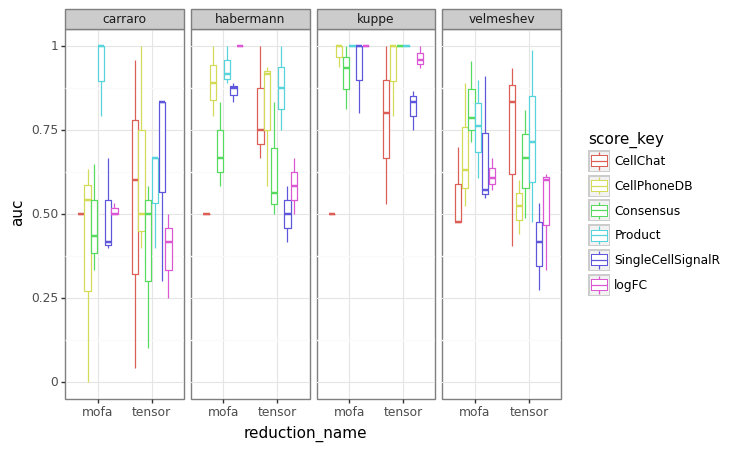

<ggplot: (8729560346345)>

In [36]:
## plot results as boxplots by reduction_name & score_key
p9.ggplot(results, p9.aes(x='reduction_name', y='auc', color='score_key')) + \
    p9.geom_boxplot() + \
    p9.theme_bw() + p9.facet_grid(' ~ dataset')

In [37]:
metric = 'mean_auc'

In [52]:
results = results[['reduction_name', 'score_key', 'mean_auc', 'mean_f1', 'dataset']].drop_duplicates()

In [53]:
results['rank'] = results.groupby(['dataset', 'reduction_name'])[metric].rank(ascending=False, method='average').astype('int')

In [54]:
results.head()

,reduction_name,score_key,mean_auc,mean_f1,dataset,rank
0,mofa,Product,0.930556,0.846537,carraro,1
1,tensor,Product,0.577778,0.613636,carraro,3
2,mofa,logFC,0.511111,0.447702,carraro,2
3,tensor,logFC,0.388889,0.525641,carraro,6
4,mofa,CellPhoneDB,0.391667,0.590404,carraro,6


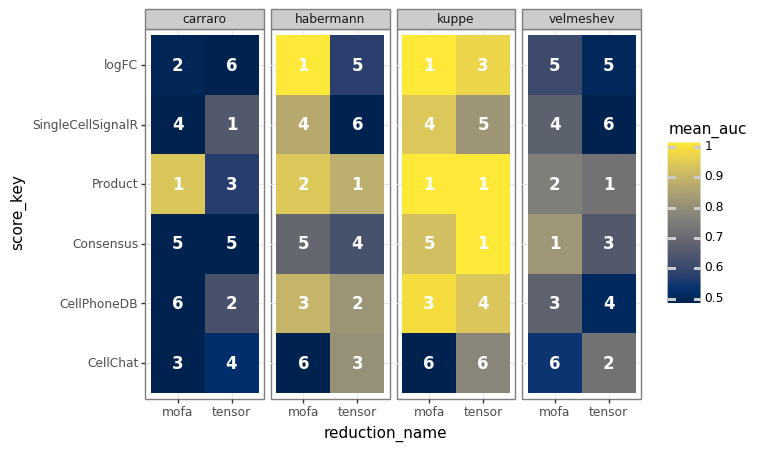

<ggplot: (8729560009786)>

In [55]:
## mosaic plot
p9.ggplot(results, p9.aes(x='reduction_name', y='score_key', fill='mean_auc')) + \
    p9.geom_tile() + \
        p9.theme_bw() + p9.facet_grid(' ~ dataset') + \
            p9.scale_fill_cmap(limits=(0.5, 1), cmap_name='cividis') + \
            p9.geom_text(p9.aes(label='rank'), size=12, color='white', fontweight='bold')

In [69]:
dimred_results = results.groupby(['reduction_name', 'score_key']).mean().reset_index()

/tmp/ipykernel_513474/2054308315.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


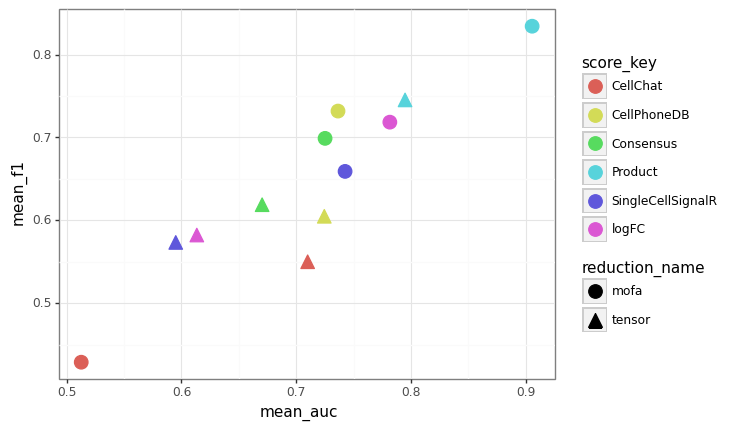

<ggplot: (8729558713591)>

In [71]:
## scatter plot by reduction_name
p9.ggplot(dimred_results, p9.aes(x='mean_auc', y='mean_f1', color='score_key', shape='reduction_name')) + \
    p9.geom_point(size=5) + \
        p9.theme_bw()